In [364]:
import pandas as pd
import os
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

In [365]:
# Combine both into one DataFrame

def combine(ez, sl):

    df = pd.concat([ez, sl])
    #df.sort_values(['hr_start', 'min_start', 'sec_start'])
    
    return df

df = combine(test_ez, test_sl)
df.head()

,hr_start,min_start,sec_start,filename,label,contacting object,opposing object
18,4,48,15,EZ1 MD_17_9_2,HC,H,B
27,5,9,10,EZ1 MD_17_9_2,HC,U,U
11,4,49,36,SL2 TD_17_9_2,HC,H,H
16,4,51,6,SL2 TD_17_9_2,HC,H,H
20,5,8,14,SL2 TD_17_9_2,HC,H,H


In [366]:
def load_files(practice_num):
    
    practice_num = str(practice_num)
    #ez = pd.read_csv(os.path.join('practices', str(practice_num), 'ez1.csv')) 
    #sl = pd.read_csv(os.path.join('practices', str(practice_num), 'sl1.csv'))
    
    file_list = os.listdir(os.path.join('practices', str(practice_num)))
    
    ez_dir = []
    sl_dir = []
    
    for i in file_list:
        if i.startswith("ez"):
            ez_dir.append(i)
        elif i.startswith("sl"):
            sl_dir.append(i)
            
    if len(ez_dir) == 0:
        ez = pd.read_csv('template.csv')
    elif len(ez_dir) == 1:
        ez = pd.read_csv(os.path.join('practices', str(practice_num), ez_dir[0]))
    elif len(ez_dir) == 2:
        ez = combine(pd.read_csv(os.path.join('practices', str(practice_num), ez_dir[0])),
                    pd.read_csv(os.path.join('practices', str(practice_num), ez_dir[1])))
        
    if len(sl_dir) == 0:
        sl = pd.read_csv('template.csv') 
    elif len(sl_dir) == 1:
        sl = pd.read_csv(os.path.join('practices', str(practice_num), sl_dir[0]))
    elif len(sl_dir) == 2:
        sl = combine(pd.read_csv(os.path.join('practices', str(practice_num), sl_dir[0])),
                    pd.read_csv(os.path.join('practices', str(practice_num), sl_dir[1])))
    
    
    return ez, sl

In [367]:
# Generates practice list from dir structure

def create_practice_list():
    dir_list = os.listdir('practices')

    practices = []
    
    for i in dir_list:
        if (i != '.ipynb_checkpoints') & (i != 'misc'):
            practices.append(str(i))
            
    return practices

In [368]:
# Test data for visualisation purposes 

test_ez, test_sl = load_files('87_9-20')  # Test
test_ez.head()

,Event Start,Unnamed: 1,Unnamed: 2,Unnamed: 3,Event End,Unnamed: 5,Unnamed: 6,Unnamed: 7,Video File of Timestamp,Event Label,Contacting Object,Opposing object,Comments (Do not use commas)
0,Hr,Min,Sec,Frame,Hr,Min,Sec,Frame,Filename of video used for event time,NaN,NaN,NaN,NaN
1,3,37,57,NaN,3,42,26,NaN,EZ1 MD_17_9_20,NC,NaN,NaN,Players do drills
2,3,42,26,NaN,3,43,3,NaN,EZ1 MD_17_9_20,SL,NaN,NaN,Player watches drills
3,3,43,3,NaN,3,43,14,NaN,EZ1 MD_17_9_20,NC,NaN,NaN,Player prepares for play
4,3,43,14,NaN,3,43,16,NaN,EZ1 MD_17_9_20,BC,U,U,Players grapple


In [369]:
# Name columns

def name_columns(ez, sl):
    columns = ['hr_start', 'min_start', 'sec_start', 'frame_start', 'hr_end', 'min_end', 'sec_end', 'frame_end', 'filename', 'label', 'contacting object', 'opposing object', 'comments']
    ez.columns = columns
    sl.columns = columns
    
    ez['filename'] = ez['filename'].mode().to_string().split('0')[1]
    sl['filename'] = sl['filename'].mode().to_string().split('0')[1]
    
    return ez, sl

test_ez, test_sl = name_columns(test_ez, test_sl)
test_ez.head()

,hr_start,min_start,sec_start,frame_start,hr_end,min_end,sec_end,frame_end,filename,label,contacting object,opposing object,comments
0,Hr,Min,Sec,Frame,Hr,Min,Sec,Frame,EZ1 MD_17_9_2,NaN,NaN,NaN,NaN
1,3,37,57,NaN,3,42,26,NaN,EZ1 MD_17_9_2,NC,NaN,NaN,Players do drills
2,3,42,26,NaN,3,43,3,NaN,EZ1 MD_17_9_2,SL,NaN,NaN,Player watches drills
3,3,43,3,NaN,3,43,14,NaN,EZ1 MD_17_9_2,NC,NaN,NaN,Player prepares for play
4,3,43,14,NaN,3,43,16,NaN,EZ1 MD_17_9_2,BC,U,U,Players grapple


In [370]:
# Get columns of interest

def columns_of_interest(ez, sl):
    columns_of_interest = ['hr_start', 'min_start', 'sec_start', 'filename', 'label', 'contacting object', 'opposing object']
    ez = ez[columns_of_interest]
    sl = sl[columns_of_interest]
    
    return ez, sl

test_ez, test_sl = columns_of_interest(test_ez, test_sl)
test_ez.head()

,hr_start,min_start,sec_start,filename,label,contacting object,opposing object
0,Hr,Min,Sec,EZ1 MD_17_9_2,NaN,NaN,NaN
1,3,37,57,EZ1 MD_17_9_2,NC,NaN,NaN
2,3,42,26,EZ1 MD_17_9_2,SL,NaN,NaN
3,3,43,3,EZ1 MD_17_9_2,NC,NaN,NaN
4,3,43,14,EZ1 MD_17_9_2,BC,U,U


In [371]:
# Cut off first index because Google Docs included titles as a row

def remove_first(ez, sl):
    ez = ez[1:]
    sl = sl[1:]
    
    return ez, sl

test_ez, test_sl = remove_first(test_ez, test_sl)
test_ez.head()

,hr_start,min_start,sec_start,filename,label,contacting object,opposing object
1,3,37,57,EZ1 MD_17_9_2,NC,NaN,NaN
2,3,42,26,EZ1 MD_17_9_2,SL,NaN,NaN
3,3,43,3,EZ1 MD_17_9_2,NC,NaN,NaN
4,3,43,14,EZ1 MD_17_9_2,BC,U,U
5,3,43,43,EZ1 MD_17_9_2,NC,NaN,NaN


In [372]:
# Get only instances with head contact (HC label)

def isolate_hc(ez, sl):
    ez = ez[ez['label'] == 'HC']
    sl = sl[sl['label'] == 'HC']
    
    return ez, sl

test_ez, test_sl = isolate_hc(test_ez, test_sl)
test_ez.head()

,hr_start,min_start,sec_start,filename,label,contacting object,opposing object
18,4,48,15,EZ1 MD_17_9_2,HC,H,B
27,5,9,10,EZ1 MD_17_9_2,HC,U,U


In [373]:
# Remove duplicate values

def drop_duplicates(df):

    df = df.drop_duplicates(subset=['hr_start', 'min_start', 'sec_start'], keep='last')
    
    return df

df = drop_duplicates(df)
df.head()

,hr_start,min_start,sec_start,filename,label,contacting object,opposing object
18,4,48,15,EZ1 MD_17_9_2,HC,H,B
27,5,9,10,EZ1 MD_17_9_2,HC,U,U
11,4,49,36,SL2 TD_17_9_2,HC,H,H
16,4,51,6,SL2 TD_17_9_2,HC,H,H
20,5,8,14,SL2 TD_17_9_2,HC,H,H


In [374]:
# Data type change

def labels_as_strings(ez, sl):
    ez['label'] = ez['label'].astype(str)
    sl['label'] = sl['label'].astype(str)
    
    return ez, sl

In [375]:
# Return number of head collisions

def count_head_impacts(df):

    try:
        return df['label'].value_counts()['HC']
    except KeyError:
        return 0

count_head_impacts(df)

6

In [376]:
# Adds a new row 'play' to DataFrame, where '1' indicates a play, and '0' indicates a waiting period

def play_counter_row(df):
    
    y_cond = (df['label'].shift(1) == 'NC') & (df['label'] != 'NC')

    df['play'] = np.where(y_cond, '1', '0')

    return df

In [377]:
# Performs basic sanitation on dataset

def prep_data_pipeline(ez, sl):
    
    ez, sl = name_columns(ez, sl)
    
    ez, sl = columns_of_interest(ez, sl)
    
    ez, sl = labels_as_strings(ez, sl)
    
    ez, sl = remove_first(ez, sl)
    
    return ez, sl  

In [378]:
# Accumulates lists of all head contacts and plays for each practice

# Returns hc, plays (both lists)
def hc_practice(practice_list):
    hc = []
    plays = []
    
    for i in practice_list:
        
        current_hc, current_plays = process_practice(i)
        
        hc.append(current_hc)
        plays.append(current_plays)
    
    return hc, plays

In [379]:
# Gets head contact and number of plays from DataFrame

# returns (hc, plays)
def process_practice(number):
    
    ez, sl = load_files(number)
    
    ez, sl = prep_data_pipeline(ez, sl)
    
    df = combine(ez, sl)
    
    df = drop_duplicates(df)
    
    df = play_counter_row(df)
    
    plays = df.shape[0] - (df['play'].value_counts()['0'])
    
    hc = count_head_impacts(df)
    
    return hc, plays

In [380]:
# Returns raw data

def create_raw_data(practices):
    hc, plays = hc_practice(practices) #hc, plays

    raw_data_dict = {
        
        'practice': practices,
        
        'hc': hc,
        
        'plays': plays
        
    }

    raw_data = pd.DataFrame(data=raw_data_dict)

    return raw_data

In [381]:
# Add calculated columns to data

def calculate_stats(df):
    
    new_df = df.copy()
    
    new_df["hc per play"] = round(new_df["hc"] / new_df["plays"], 3)
    
    # Reorder
    new_df = new_df[['practice', 'plays', 'hc', 'hc per play']]
    
    return new_df  

In [382]:
def get_player(row):
    return row['practice'][0:2]

def get_practice(row):
    return row['practice'][3:]

In [383]:
# Display results


def results():
    
    practices = create_practice_list()
    
    raw_data = create_raw_data(practices)
    
    final_data = calculate_stats(raw_data)
    
    final_data['player'] = final_data.apply(get_player, axis=1)
    
    final_data['practice'] = final_data.apply(get_practice, axis=1)
    
    display_data = pd.DataFrame.from_dict(final_data)

    return display_data

display(results())

,practice,plays,hc,hc per play,player
0,11-21,36,15,0.417,75
1,11-22,34,9,0.265,75
2,11-28,36,12,0.333,75
3,9-19,32,5,0.156,87
4,9-20,31,6,0.194,87


In [384]:
# Generates a DataFrame for each pair of ez, sl. Then combines all into one DataFrame

def hc_combos(number):
    
    frames = []
    
    for i in number:
        ez, sl = load_files(i)

        ez, sl = prep_data_pipeline(ez, sl)

        df = combine(ez, sl)

        df = drop_duplicates(df)
        
        frames.append(df)

    new_df = pd.concat(frames)
    
    return new_df

In [385]:
# Group data by combinations of HF-HF, HF-HS, etc... 

practices = create_practice_list()

df = hc_combos(practices)
df, df = isolate_hc(df, df)

columns_of_interest = ['label', 'contacting object', 'opposing object']

df = df[columns_of_interest]

num_rows = df.shape[0]

stats = df.groupby(['contacting object', 'opposing object']).size().reset_index().rename(columns={0:'count'})

stats['percent'] = round(((stats['count'] / num_rows) * 100), 1)

stats

,contacting object,opposing object,count,percent
0,H,B,1,2.1
1,H,H,3,6.4
2,H,U,1,2.1
3,HF,B,4,8.5
4,HF,H,1,2.1
5,HF,HF,22,46.8
6,HF,HT,1,2.1
7,HS,B,2,4.3
8,HS,HF,1,2.1
9,HS,HS,5,10.6


In [386]:
# Generate data needed for pie plot

def plot_prepare(dataframe):
    length = stats.shape[0]

    labels = []
    sizes = []

    for i in range(length):
        labels.append(str(dataframe['contacting object'][i] + "-" + dataframe['opposing object'][i]))
        sizes.append(round(int(dataframe['percent'][i]), 2))

    labels = np.array(labels)
    sizes = np.array(sizes)

    inds = sizes.argsort()
    sizes = sizes[inds]
    labels = labels[inds]
    
    return labels, sizes
    

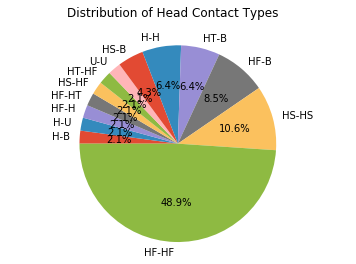

In [387]:
# Display head-contact combinations in a pie plot

labels, sizes = plot_prepare(stats)

import matplotlib.pyplot as plt
import pylab

fig1, ax1 = plt.subplots()

# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=False, startangle=180,
       counterclock=False)
 
plt.style.use('ggplot')
plt.axis('equal')
plt.suptitle('Distribution of Head Contact Types')
plt.savefig('pie chart.png', dpi=1000)
plt.show()